Dans ce script, nous allons tester différents modèles de type convolution Nelle pour examiner leur performance. Nous allons ensuite tester s'ils sont robustes lorsqu'on applique une rotation à l'image d'entrée.

In [1]:
import retinoto_py as fovea
args = fovea.Params(do_fovea=True, n_train_stop=2_000, n_val_stop=1_000)
args

Welcome on macOS-26.1-arm64-arm-64bit-Mach-O	 user laurent	Running on MPS device (Apple Silicon/MacOS)	 - macos_version = 26.1	 with device mps, pytorch==2.9.1
Random seed 1998 has been set.


Params(image_size=224, do_mask=False, do_fovea=True, rs_min=0.0, rs_max=-5.0, padding_mode='zeros', seed=1998, batch_size=64, num_workers=4, in_memory=True, model_name='resnet101', do_scratch=False, num_epochs=10, n_train_stop=2000, n_val_stop=1000, lr=0.001, delta1=0.05, delta2=0.0, weight_decay=0.003, label_smoothing=0.0001, shuffle=True, verbose=True)

In [2]:
# from pathlib import Path
# from PIL import Image, UnidentifiedImageError, ImageFile

# # Raise the limit temporarily so we can *read* the image and inspect the size.
# ImageFile.MAX_TEXT_CHUNK = 50 * 1024 * 1024   # 50 MiB – just for debugging

# def is_png_too_big(p):
#     try:
#         with Image.open(p) as im:
#             # Force loading of the ICC profile (or any text chunk)
#             _ = im.info.get('icc_profile')
#             return False   # no exception → fine
#     except ValueError as e:
#         if 'MAX_TEXT_CHUNK' in str(e):
#             return True
#         raise
#     except UnidentifiedImageError:
#         # Not a valid image at all – treat as problematic
#         return True

# dataset = 'bbox'
# TRAIN_DATA_DIR = args.DATAROOT / f'Imagenet_{dataset}' / 'train'
# bad = [p for p in TRAIN_DATA_DIR.rglob('*.png') if is_png_too_big(p)]
# print(f'Found {len(bad)} PNGs that exceed the text‑chunk limit:')
# for p in bad[:10]:
#     print('  ', p)

# testing each network on the validation dataset

In [3]:
%ls cached_data/32*

cached_data/32_fovea_model_name=resnet101_dataset=bbox_retrained_bkp.json
cached_data/32_fovea_model_name=resnet101_dataset=bbox_retrained_bkp.pth
cached_data/32_fovea_model_name=resnet101_dataset=bbox_retrained.lock
cached_data/32_fovea_model_name=resnet101_dataset=full_retrained.json
cached_data/32_fovea_model_name=resnet101_dataset=full_retrained.pth


In [4]:
# %rm "cached_data/32_fovea_model_name=resnet101_dataset=bbox"  # FORCING RECOMPUTE
%rm "cached_data/32_fovea_model_name=resnet101_dataset=bbox_retrained.lock"  # FORCING RECOMPUTE
# %rm cached_data/32_fovea_model_*  # FORCING RECOMPUTE
# %rm cached_data/32_fovea_model_*.lock  # FORCING RECOMPUTE
model_name = args.model_name
for dataset in fovea.all_datasets:
    name = f'32_fovea_model_name={model_name}_dataset={dataset}_retrained'
    model_filename, json_filename = fovea.do_learning(args, dataset, name)
    print(50*'.')

Load JSON from pre-trained resnet cached_data/32_fovea_model_name=resnet101_dataset=full_retrained.json
cached_data/32_fovea_model_name=resnet101_dataset=full_retrained.pth: accuracy = 0.703
..................................................


Putting images in memory:   0%|          | 0/2000 [00:00<?, ?it/s]

libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'dmnd': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC 

Putting images in memory:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'bkpt': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'dmnd': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'dmdd': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'vued': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'view': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'lumi

Training model resnet101, file= cached_data/32_fovea_model_name=resnet101_dataset=bbox_retrained.pth - image_size=224
Model has 1000 output features to final FC layer for 1000 classes.
Starting learning...


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

epoch=1/10:   0%|          | 0/31 [00:00<?, ?it/s]

Vat @Epoch 1/10:   0%|          | 0/15 [00:00<?, ?it/s]

epoch=2/10:   0%|          | 0/31 [00:00<?, ?it/s]

Vat @Epoch 2/10:   0%|          | 0/15 [00:00<?, ?it/s]

epoch=3/10:   0%|          | 0/31 [00:00<?, ?it/s]

Vat @Epoch 3/10:   0%|          | 0/15 [00:00<?, ?it/s]

epoch=4/10:   0%|          | 0/31 [00:00<?, ?it/s]

Vat @Epoch 4/10:   0%|          | 0/15 [00:00<?, ?it/s]

epoch=5/10:   0%|          | 0/31 [00:00<?, ?it/s]

Vat @Epoch 5/10:   0%|          | 0/15 [00:00<?, ?it/s]

epoch=6/10:   0%|          | 0/31 [00:00<?, ?it/s]

Vat @Epoch 6/10:   0%|          | 0/15 [00:00<?, ?it/s]

epoch=7/10:   0%|          | 0/31 [00:00<?, ?it/s]

Vat @Epoch 7/10:   0%|          | 0/15 [00:00<?, ?it/s]

epoch=8/10:   0%|          | 0/31 [00:00<?, ?it/s]

Vat @Epoch 8/10:   0%|          | 0/15 [00:00<?, ?it/s]

epoch=9/10:   0%|          | 0/31 [00:00<?, ?it/s]

Vat @Epoch 9/10:   0%|          | 0/15 [00:00<?, ?it/s]

epoch=10/10:   0%|          | 0/31 [00:00<?, ?it/s]

Vat @Epoch 10/10:   0%|          | 0/15 [00:00<?, ?it/s]

Saving...cached_data/32_fovea_model_name=resnet101_dataset=bbox_retrained.pth
Training completed in 3m 20s
..................................................


## Model comparison

In [5]:
model_name = args.model_name
for dataset in fovea.all_datasets:
    results = fovea.pd.read_json(args.data_cache / f'32_fovea_model_name={model_name}_dataset={dataset}_retrained.json')
    print(model_name, dataset, results.tail(1)['acc_val'])

resnet101 full 9    0.702881
Name: acc_val, dtype: float64
resnet101 bbox 9    0.543
Name: acc_val, dtype: float64


In [6]:

len(results)

10

In [7]:
results.tail(1)

,epoch,i_image,total_image,loss_train,acc_train,loss_val,acc_val,time
9,9,960,19840,0.042023,0.995968,2.108589,0.543,199.594979


In [8]:
results.tail(1)['acc_val']

9    0.543
Name: acc_val, dtype: float64

In [9]:
results_13 = fovea.pd.read_json(args.data_cache / '13_model_comparison.json')
results_13

,model_name,do_mask,dataset,accuracy,wall_clock_time,total_parameters,trainable_parameters,total_layers
0,resnet18,True,full,0.528809,9.539842,11689512,11689512,68
1,resnet50,True,full,0.789307,15.991482,25557032,25557032,151
2,resnet101,True,full,0.807129,29.764273,44549160,44549160,287
3,resnet18,True,bbox,0.419678,8.108312,11689512,11689512,68
4,resnet50,True,bbox,0.723145,14.678932,25557032,25557032,151
5,resnet101,True,bbox,0.753174,21.924049,44549160,44549160,287
6,resnet18,False,full,0.686768,9.219930,11689512,11689512,68
7,resnet50,False,full,0.802979,15.812416,25557032,25557032,151
8,resnet101,False,full,0.803223,22.476610,44549160,44549160,287
9,resnet18,False,bbox,0.625000,7.508915,11689512,11689512,68


In [10]:
%ls cached_data/20*

cached_data/20_model_name=resnet101_dataset=bbox_retrained.json
cached_data/20_model_name=resnet101_dataset=bbox_retrained.pth
cached_data/20_model_name=resnet101_dataset=full_retrained.json
cached_data/20_model_name=resnet101_dataset=full_retrained.pth


In [11]:
model_name, dataset

('resnet101', 'bbox')

In [12]:
# results_20 = fovea.pd.read_json(args.data_cache / '20_model_name={model_name}_dataset={dataset}_retrained.json')
# results_20

In [13]:
# for dataset in fovea.all_datasets:
#     name = f'20_model_name={model_name}_dataset={dataset}_retrained'
#     model_filename, json_filename = fovea.do_learning(args, dataset, name)
#     results = fovea.pd.read_json(json_filename)
#     print(results)

## Plot learning evolution

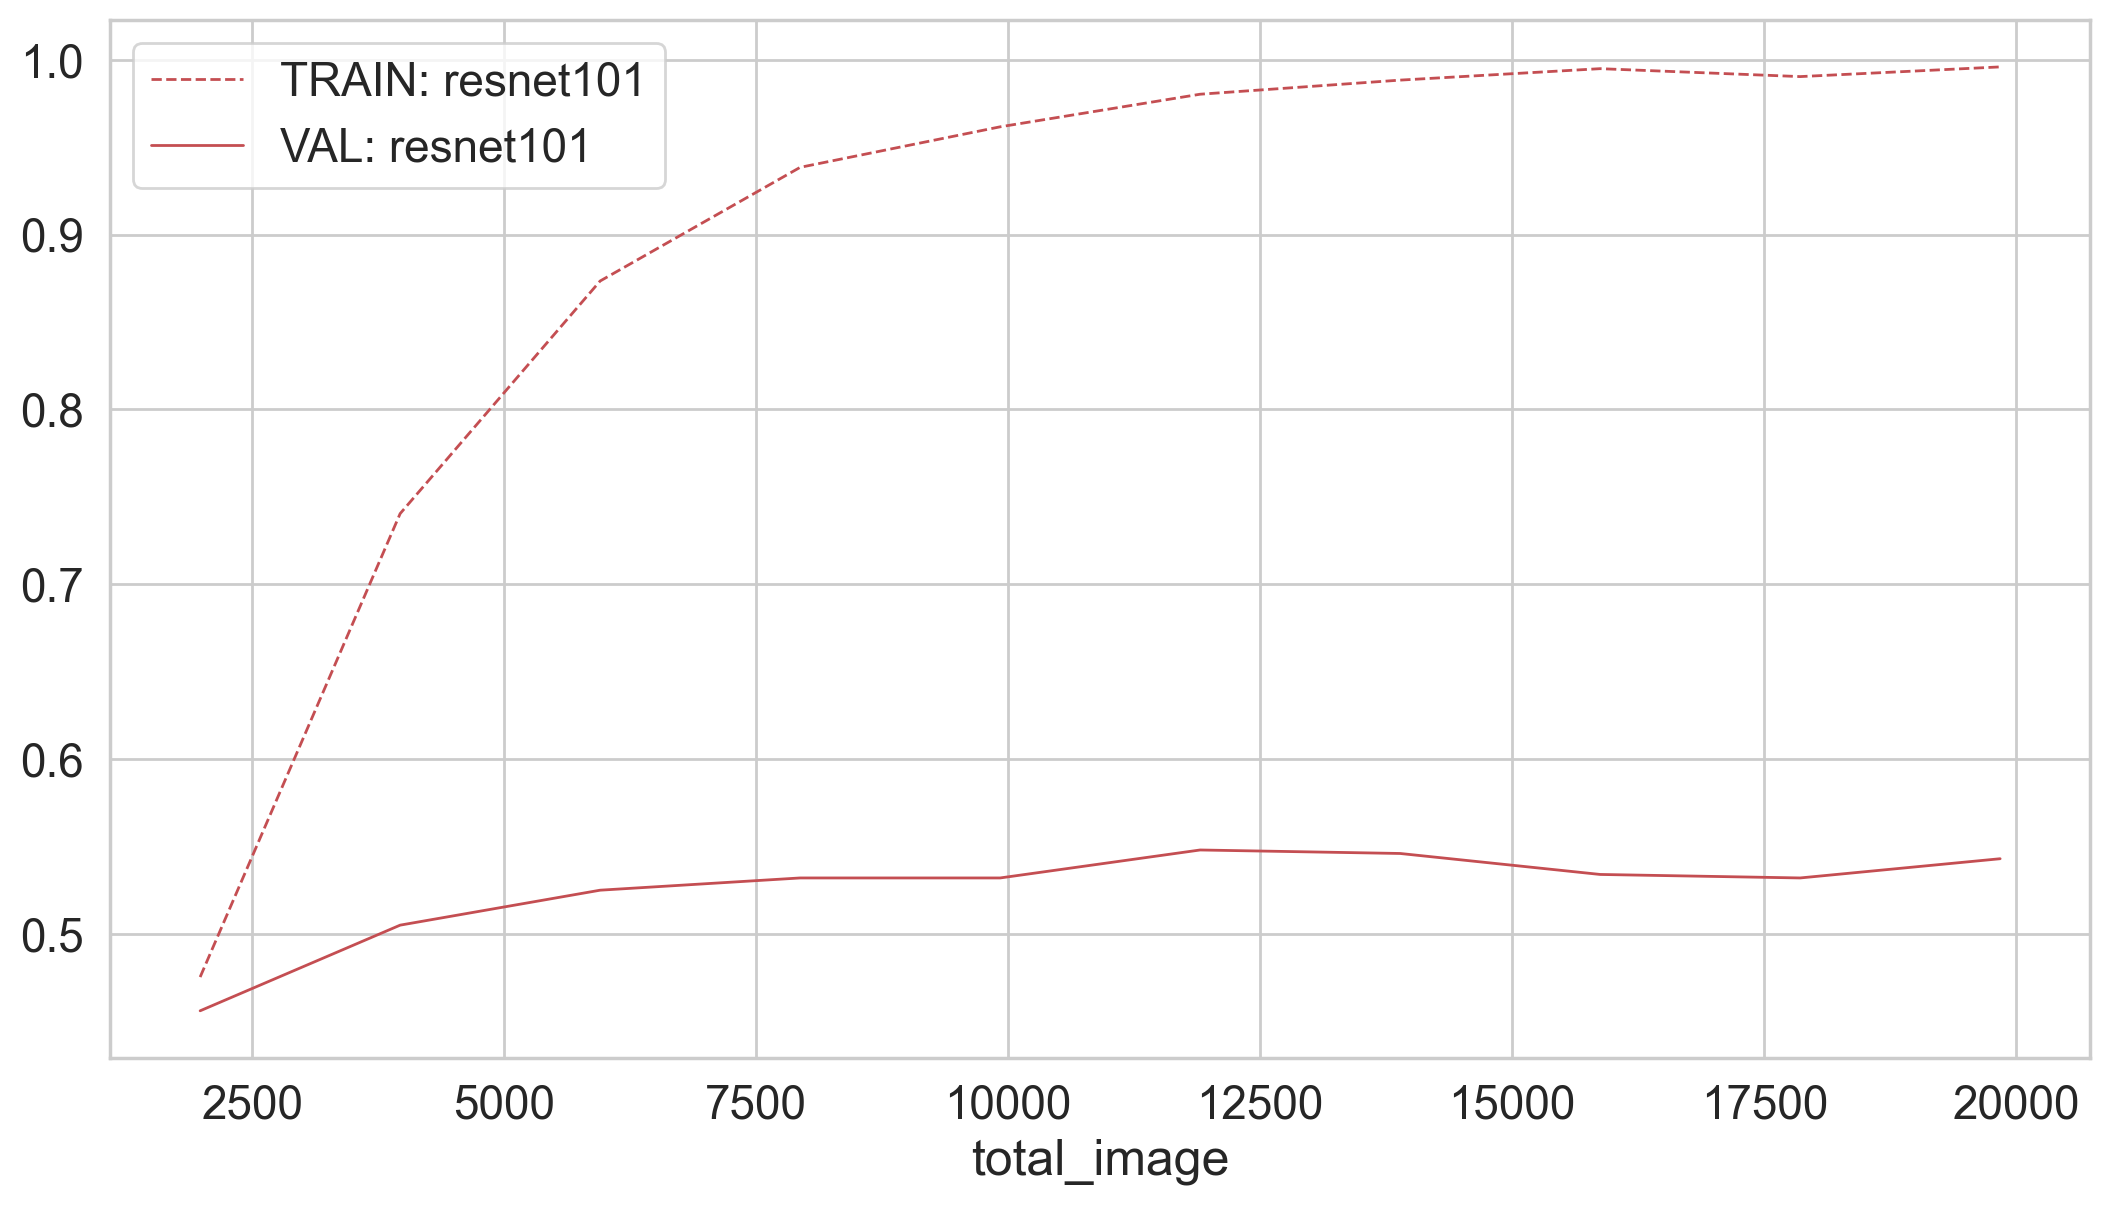

In [14]:
fig, ax = fovea.plt.subplots()
for dataset in ['bbox']:#fovea.all_datasets:
    color = 'r'
    lw = 1

    # name = f'32_fovea_model_name={model_name}_dataset={dataset}_retrained'
    # cached_data/32_fovea_model_name=resnet101_dataset=bbox_retrained.json
    json_filename = args.data_cache / f'32_fovea_model_name={model_name}_dataset={dataset}_retrained.json'
    # model_filename, json_filename = fovea.do_learning(args, dataset, name)

    df_train = fovea.pd.read_json(json_filename, orient='records')

    # df_train_roll = df_train.rolling(window=5, min_periods=1, center=False).mean()
    ax = df_train.plot(x='total_image', y='acc_train', 
                        c=color, ls='dashed', lw=lw,
                        grid=True, ax=ax, label='TRAIN: ' + args.model_name)    
    ax = df_train.plot(x='total_image', y='acc_val', 
                        c=color, lw=lw,
                        grid=True, ax=ax, label='VAL: ' + args.model_name)   

In [15]:
df_train

,epoch,i_image,total_image,loss_train,acc_train,loss_val,acc_val,time
0,0,960,1984,2.703408,0.475302,2.557144,0.456,20.594792
1,1,960,3968,1.113381,0.740423,2.232878,0.505,41.107185
2,2,960,5952,0.538440,0.873488,2.156848,0.525,61.669081
3,3,960,7936,0.289599,0.938508,2.093179,0.532,82.243112
4,4,960,9920,0.188287,0.961694,2.097699,0.532,102.835484
5,5,960,11904,0.119765,0.980343,2.067014,0.548,121.960363
6,6,960,13888,0.087002,0.988407,2.118780,0.546,138.434740
7,7,960,15872,0.059674,0.994960,2.119292,0.534,158.844746
8,8,960,17856,0.058281,0.990423,2.143428,0.532,179.238622
9,9,960,19840,0.042023,0.995968,2.108589,0.543,199.594979


In [16]:
json_filename

PosixPath('cached_data/32_fovea_model_name=resnet101_dataset=bbox_retrained.json')